In [ ]:
## colocar título,logo etc.

In this part, we are going to give you an intuitive view about the DWT _(Discrete Wavelet Transform)_ Algorithm, so that you can better visualize and understand the process.

When studying the Fourier transform, we can discover that it is a powerful tool to analyse signals. For example, taking the simple cosine signal:

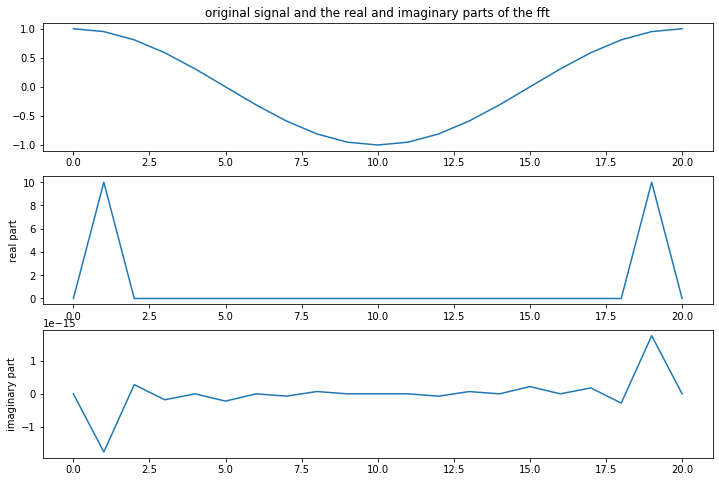

In [17]:
import numpy as np
import matplotlib.pyplot as plt

n = 20

# definition of a
m = np.arange(n)
a = np.cos(m * 2*np.pi/n)

# visualisation of a 
plt.figure(figsize=(12,8))
plt.subplot(311)
plt.plot( np.append(a, a[0]) )
plt.title('original signal and the real and imaginary parts of the fft')
# calcul de A
A = np.fft.fft(a)

# visualisation of A

B = np.append(A, A[0])
plt.subplot(312)
plt.plot(np.real(B))
plt.ylabel("real part")

plt.subplot(313)
plt.plot(np.imag(B))
plt.ylabel("imaginary part")

plt.show()

The Fourier Transform provides us with a complete analysis on the frequency domain, which is quite useful. In this simple
case,however, the dimension of time is not important, as the signal is stationary, and therefore, predictable. 

Real world data is not like that. Taking Apple stock prices for example:


![a](https://www.investopedia.com/thmb/YNlMraE_AO17YtLNvPE9PAz-eQA=/650x366/filters:no_upscale():max_bytes(150000):strip_icc()/2339e6914dfc470bcf2d71f829564fa1-5bfd81f94cedfd0026fefb51)

It is possible to see that there is a lot of irregular behavior on time.

### Time x Frequency Analysis

Considering a signal, there are two main types of analysis that are possible to be done with it, in time or in frequency.

When performing time analysis, we have this representation:

![b](time.png)

In sampling in time, what is obtained is a great resolution in time, but without any frequency content information. That is, we know well how our signal behaves in time, but we have no idea about frequency behavior.

On the other hand, when performing frequency analysis, we have this representation:

![c](freq.png)

When performing the fourier transform, as our signal is transformed into an infinite series of cosines and sines, we do the frequency analysis as represented above, but we completely ignore time dimension, something that is not good when working with real-world data, as the abrupt changes contained for example, in Apple's stock price are important events, and therefore is necessary to conserve information about their time occurency.

So, in order to try to fix that, we will try to produce something like this:
    
![d](ft.png)

As the area of each square is fixed (the time bandwidht product in the fourier transform is constant), we can see the compromise appear:

__As we try to increase our resolution in one of the domains (frequency or time), the resolution on the other one decreases automatically.__

Therefore, we will have to try to optimize that, and there is where wavelets and the discrete wavelet transform come in.

### Wavelets

_"A wavelet is a rapidly decaing wave like oscilation that has zero mean"._

A wavelet has a finite duration.

There are many types of wavelets, so you can choose the best one for your problem. 

### Main concepts of Wavelets

#### Scaling : 
Scaling is basically shrinking or streching the signal. 

Mathematically,

<center>$\psi(t/s)>0$</center>

where $s$ is the scaling factor. 
There is a relationship between the scaling factor and the frequency behavior of the signal.

As an example, scaling a sine of a factor of 2 in time means dividing its original frequency by 2.

#### Shifting

Shifting is basically moving our signal throught time to another point.

### Discrete Wavelet Transform (DWT)


In the DWT, the operations of scaling and shifting are done respectively by:


<center>$2^{j}, j =(1,2,3,..)$</center>

<center>$2^{j}m, m =(1,2,3,..)$</center>

The DWT process is equivalent to comparing a signal with discrete multi rate filter banks.

A visual representation of the algorithm is that:

![f](dwt.png)

We sucessively apply the signal to low-pass and high-pass filters and keey the coefficients given by the output of the high-pass filter. 

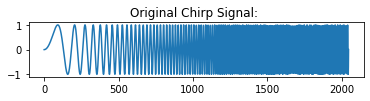

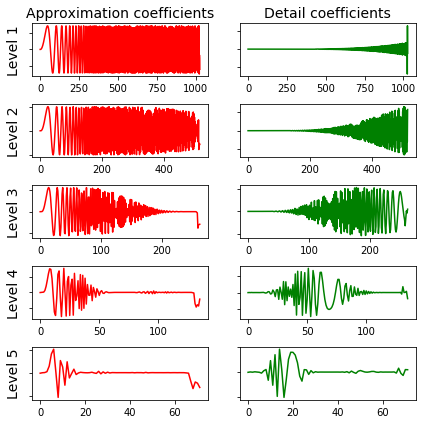

In [35]:
import pywt
 
x = np.linspace(0, 1, num=2048)
chirp_signal = np.sin(250 * np.pi * x**2)
    
fig, ax = plt.subplots(figsize=(6,1))
ax.set_title("Original Chirp Signal: ")
ax.plot(chirp_signal)
plt.show()
    
data = chirp_signal
waveletname = 'sym5'
 
fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=(6,6))
for ii in range(5):
    (data, coeff_d) = pywt.dwt(data, waveletname)
    axarr[ii, 0].plot(data, 'r')
    axarr[ii, 1].plot(coeff_d, 'g')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
plt.tight_layout()
plt.show()

It is an algorithm ideal for denoising and compression, as it allows the representation of the signal with fewer coefficients.

It is possbile to do the decomposition in other ways, producing other _time x frequency_ partitions.

Getting back to the previous representation, what happens can be visualized as follows:

![f](res.jpg)

As it is possible to see,in DWT, in the beggining, when passing the first filters, whe get just the high frequencies and
an excellent time-resolution. As the frequencies begin to decrease, we increase our frequency resolution, but because of 
the compromise, descrease our time resolution.

Thinking the filters in terms of windows, the DWT consists in sucessively passing windows throught the analised signal,
capturing the corresponding frequency, and after subtracting this info from the original signal, increase the size of the
window and repeating the process.